##### HELP is an committed to fighting poverty and providing backward countries with basic amenities and relief during the time of disasters and natural calamities. 

# Now the CEO of the NGO needs to decide how to use money strategically and effectively. 
# The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

In [2]:
# Business Goal-
# The job is to categorise the countries using some socio-economic and health factors that determine overall development of the country. 
# Then we need to suggest the countries which the CEO needs to focus on the most.

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Country-data.csv')

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# Column description-

# country      Name of the country
# child_mort   Death of children under 5 years of age per 1000 live births
# exports      Exports of goods and services. Given as %age of the Total GDP
# health       Total health spending as %age of Total GDP
# imports      Imports of goods and services. Given as %age of the Total GDP
# Income       Net income per person
# Inflation    The measurement of the annual growth rate of the Total GDP
# life_expec   The average number of years a new born child would live if the current mortality patterns are to remain the same
# total_fer    The number of children that would be born to each woman if the current age-fertility rates remain the same.
# gdpp         The GDP per capita. Calculated as the Total GDP divided by the total population.

In [7]:
df.shape

(167, 10)

In [8]:
df.isnull().sum()
#No null values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
#Removing duplicate rows
df = df.drop_duplicates()

In [10]:
df.shape

(167, 10)

In [11]:
#Percentages do not show the real picture so converting them to actual values.
df['exports'] =df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [12]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [13]:
df.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Chad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [14]:
#There are outliers in exports, health, imports, income, inflation, gdpp column.
#We can guess this as there is lot of difference between 75% and max of these columns.

In [15]:
q = df['exports'].quantile(0.99) 
df = df[df['exports']<q]

q = df['health'].quantile(0.99) 
df = df[df['health']<q]

q = df['imports'].quantile(0.99) 
df = df[df['imports']<q]

q = df['income'].quantile(0.99) 
df = df[df['income']<q]

q = df['inflation'].quantile(0.99) 
df = df[df['inflation']<q]

q = df['gdpp'].quantile(0.99) 
df = df[df['gdpp']<q]

In [16]:
#After removing outliers
df.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,155,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
unique,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Poland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.942581,4440.596500,787.163123,4307.494723,14026.535484,7.180935,69.964516,3.007290,9871.509677
std,NaN,40.270806,6626.732277,1278.764884,5881.988346,13756.372526,6.905820,8.822593,1.522768,12951.855497
min,NaN,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.230000,231.000000
25%,NaN,10.250000,414.393000,67.631000,545.140000,3170.000000,1.880000,64.300000,1.795000,1310.000000
50%,NaN,21.100000,1593.320000,267.895000,1814.850000,9720.000000,5.440000,71.600000,2.540000,4460.000000
75%,NaN,62.400000,5603.500000,797.025000,5692.860000,20100.000000,10.750000,76.400000,4.160000,11950.000000


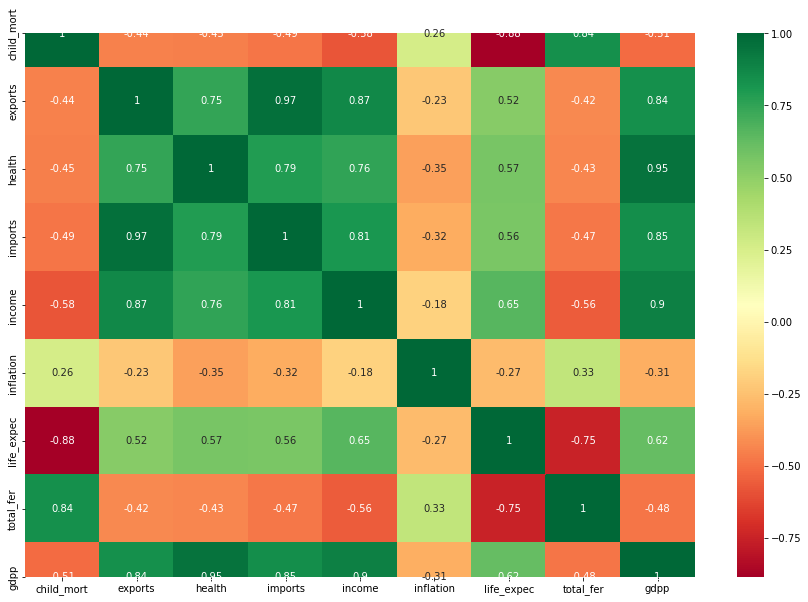

In [17]:
# Drawing a heatmap to see the corelation among all columns
plt.figure(figsize = (15,10))        
sns.heatmap(df.corr(),annot = True,cmap='RdYlGn')
plt.show()

In [18]:
matrix = df.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.443995 -0.451815 -0.485983 -0.582355   0.258858   
exports      -0.443995  1.000000  0.749209  0.970337  0.868482  -0.225861   
health       -0.451815  0.749209  1.000000  0.792875  0.757057  -0.354434   
imports      -0.485983  0.970337  0.792875  1.000000  0.814104  -0.321788   
income       -0.582355  0.868482  0.757057  0.814104  1.000000  -0.183887   
inflation     0.258858 -0.225861 -0.354434 -0.321788 -0.183887   1.000000   
life_expec   -0.884291  0.523950  0.568459  0.560375  0.654669  -0.272827   
total_fer     0.838893 -0.423661 -0.433390 -0.473492 -0.555726   0.331334   
gdpp         -0.511726  0.843588  0.951921  0.848486  0.901181  -0.312643   

            life_expec  total_fer      gdpp  
child_mort   -0.884291   0.838893 -0.511726  
exports       0.523950  -0.423661  0.843588  
health        0.568459  -0.433390  0.951921  
imports       0.5603

In [19]:
#child_mort is highly co-related to life_expec and total_fer.
#exports and is highly co-related to imports and income.
#health is highly co-related to gdpp.
#imports is highly co-related to exports.
#income is highly co-related to gdpp and exports.

In [21]:
#Exploring some of the important corelations between columns-

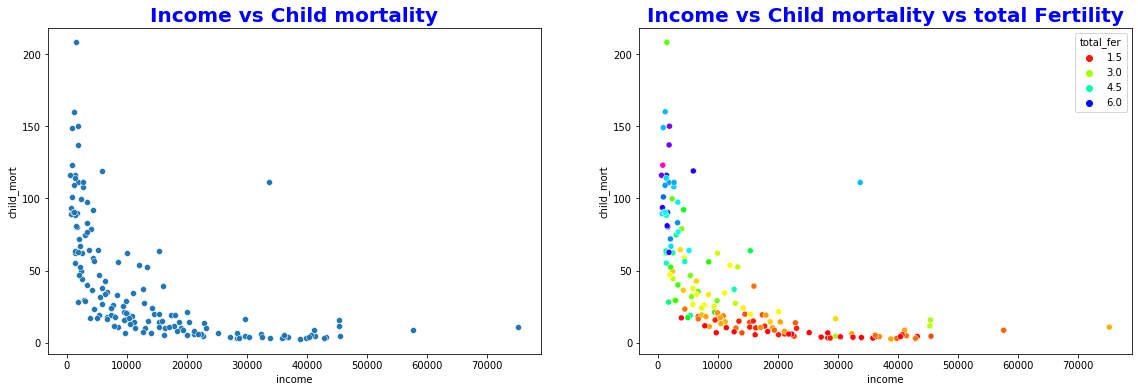

In [22]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='income',y='child_mort', data=df)
plt.title('Income vs Child mortality',fontweight="bold", size=20, color='blue')

plt.subplot(1, 2, 2)
sns.scatterplot(x='income',y='child_mort',hue='total_fer', data=df, palette='gist_rainbow')
plt.title('Income vs Child mortality vs total Fertility',fontweight="bold", size=20, color='blue')
plt.subplots_adjust(right=1.2)
plt.show()

In [23]:
#In the 1st graph we observe that people with high income have low child mortality and those with low income have high child_mort.
#In the 2nd graph we observe that people with low income, high fertility have high child mortality. People with high income, low fertility have low child mortality.

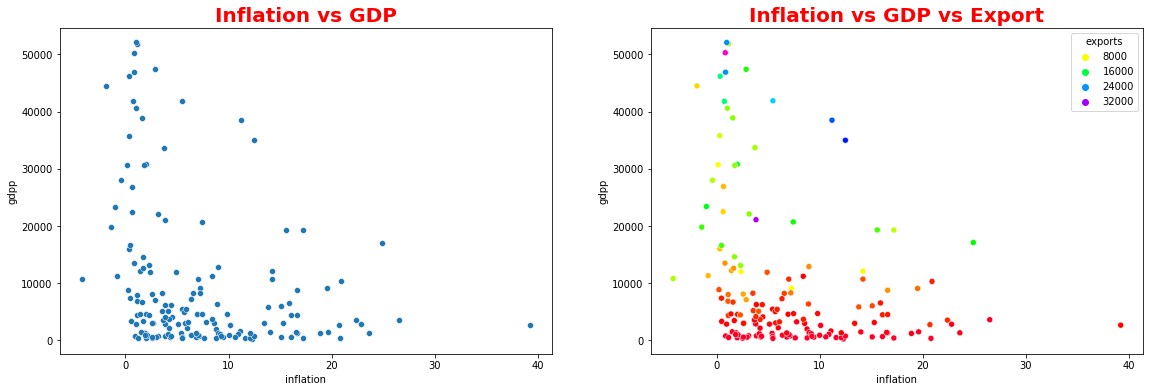

In [24]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='inflation',y='gdpp', data=df)
plt.title('Inflation vs GDP',fontweight="bold", size=20, color='red')

plt.subplot(1, 2, 2)
sns.scatterplot(x='inflation',y='gdpp',hue='exports', data=df, palette='gist_rainbow')
plt.title('Inflation vs GDP vs Export',fontweight="bold", size=20, color='red')
plt.subplots_adjust(right=1.2)
plt.show()

In [25]:
#In the 1st graph we observe that countries with high inflation have low GDP and those with low inflation have high GDP.
#In the 2nd graph we observe that countries with with low GDP have high export, no matter whether inflation is high or low (but more if inflation is low).
#Countries with high GDP and low inflation have very low export.

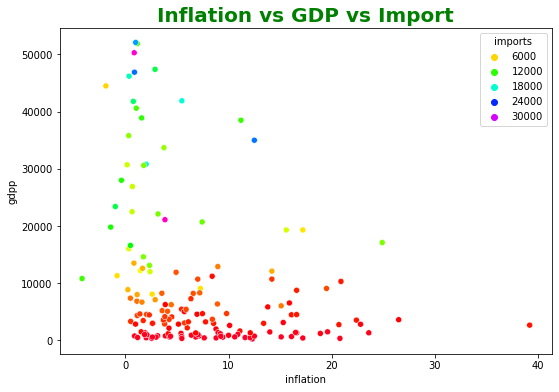

In [26]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
sns.scatterplot(x='inflation',y='gdpp',hue='imports', data=df, palette='gist_rainbow')
plt.title('Inflation vs GDP vs Import',fontweight="bold", size=20, color='green')
plt.subplots_adjust(right=1.2)
plt.show()

In [27]:
#In the above graph we observe that countries with with low GDP have high import, no matter whether inflation is high or low (but more if inflation is low).
#Countries with high GDP and low inflation have low import.

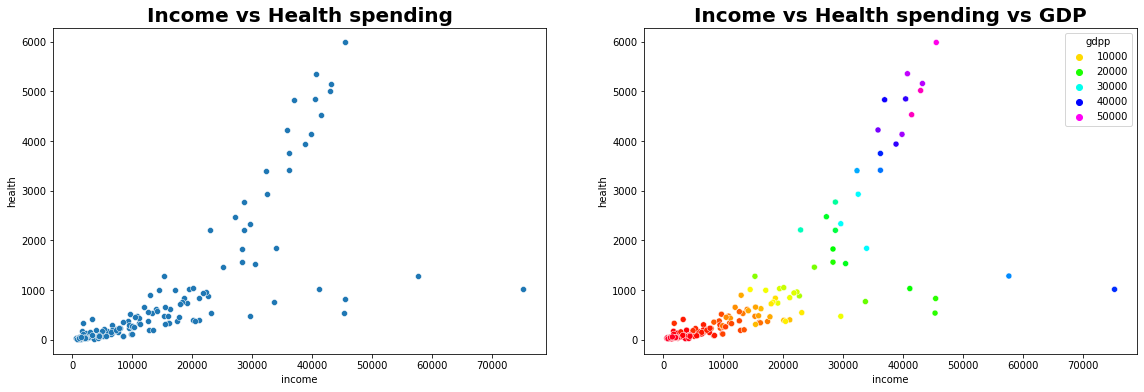

In [28]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='income',y='health', data=df)
plt.title('Income vs Health spending',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.scatterplot(x='income',y='health',hue='gdpp', data=df, palette='gist_rainbow')
plt.title('Income vs Health spending vs GDP',fontweight="bold", size=20)
plt.subplots_adjust(right=1.2)
plt.show()

In [29]:
#In the 1st graph we observe that people with high income have better health.
#In the 2nd graph we observe that countries with low income, low health have low GDP. Countries with high income, better health have more GDP.

In [30]:
#Since we have to find countries which need NGO's help the most, we need to find countries which are doing worst in the given metrics.

#Countries with worst child mortality rate
df.sort_values(by=['child_mort'], ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.200,55.0,5.20,399
32,Chad,150.0,330.096,40.6341,390.195,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.010,47.5,5.21,446
97,Mali,137.0,161.424,35.2584,248.508,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
135,Slovenia,3.2,15046.200,2201.9400,14718.600,28700,-0.987,79.5,1.57,23400
77,Japan,3.2,6675.000,4223.0500,6052.000,35800,-1.900,82.8,1.39,44500
144,Sweden,3.0,24070.200,5017.2300,21204.700,42900,0.991,81.5,1.98,52100
53,Finland,3.0,17879.400,4134.9000,17278.800,39800,0.351,80.0,1.87,46200


In [31]:
#Haiti, Sierra Leone, Chad, Central African Republic and Mali have worst child mortality rate.
#Slovenia, Japan, Sweden, Finland and Iceland with best child mortality rate.

In [32]:
#Countries with least exports.
df.sort_values(by=['exports'], ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
110,Netherlands,4.5,36216.00000,5985.7000,31990.800000,45500,0.848,80.7,1.79,50300
98,Malta,6.8,32283.00000,1825.1500,32494.000000,28300,3.830,80.3,1.36,21100
157,United Arab Emirates,8.6,27195.00000,1281.0000,22260.000000,57600,12.500,76.5,1.87,35000
82,Kuwait,10.8,25679.50000,1012.5500,11704.000000,75200,11.200,78.2,2.21,38500
144,Sweden,3.0,24070.20000,5017.2300,21204.700000,42900,0.991,81.5,1.98,52100
...,...,...,...,...,...,...,...,...,...,...
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.440,56.2,5.82,553
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.010,47.5,5.21,446
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.600,61.7,4.61,482
26,Burundi,93.6,20.60520,26.7960,90.552000,764,12.300,57.7,6.26,231


In [33]:
#Afghanistan, Central African Republic, Eritrea, Burundi and Myanmar have least export.

In [34]:
#Countries with least imports.
df.sort_values(by=['imports'], ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
98,Malta,6.8,32283.00000,1825.1500,32494.000000,28300,3.830,80.3,1.36,21100
110,Netherlands,4.5,36216.00000,5985.7000,31990.800000,45500,0.848,80.7,1.79,50300
8,Austria,4.3,24059.70000,5159.0000,22418.200000,43200,0.873,80.5,1.44,46900
157,United Arab Emirates,8.6,27195.00000,1281.0000,22260.000000,57600,12.500,76.5,1.87,35000
144,Sweden,3.0,24070.20000,5017.2300,21204.700000,42900,0.991,81.5,1.98,52100
...,...,...,...,...,...,...,...,...,...,...
132,Sierra Leone,160.0,67.03200,52.2690,137.655000,1220,17.200,55.0,5.20,399
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.010,47.5,5.21,446
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.600,61.7,4.61,482
26,Burundi,93.6,20.60520,26.7960,90.552000,764,12.300,57.7,6.26,231


In [35]:
#Sierra Leone, Central African Republic, Eritrea, Burundi and Myanmar have least import.

In [36]:
#Countries with least health spending.
df.sort_values(by=['health'], ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
110,Netherlands,4.5,36216.00000,5985.7000,31990.800000,45500,0.848,80.7,1.79,50300
29,Canada,5.6,13793.40000,5356.2000,14694.000000,40700,2.870,81.3,1.63,47400
8,Austria,4.3,24059.70000,5159.0000,22418.200000,43200,0.873,80.5,1.44,46900
144,Sweden,3.0,24070.20000,5017.2300,21204.700000,42900,0.991,81.5,1.98,52100
58,Germany,4.2,17681.40000,4848.8000,15507.800000,40400,0.758,80.1,1.39,41800
...,...,...,...,...,...,...,...,...,...,...
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.040,66.8,2.41,988
112,Niger,123.0,77.25600,17.9568,170.868000,814,2.550,58.8,7.49,348
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.010,47.5,5.21,446
93,Madagascar,62.2,103.25000,15.5701,177.590000,1390,8.790,60.8,4.60,413


In [37]:
#Madagascar, Central African Republic, Eritrea, Niger and Myanmar have least health spending.

In [38]:
#Countries with worst per person income
df.sort_values(by=['income'], ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
82,Kuwait,10.8,25679.5000,1012.5500,11704.000,75200,11.200,78.2,2.21,38500
157,United Arab Emirates,8.6,27195.0000,1281.0000,22260.000,57600,12.500,76.5,1.87,35000
110,Netherlands,4.5,36216.0000,5985.7000,31990.800,45500,0.848,80.7,1.79,50300
128,Saudi Arabia,15.7,9572.8000,827.9700,6369.000,45400,17.200,75.1,2.96,19300
115,Oman,11.7,12680.1000,534.6100,7951.600,45300,15.600,76.1,2.90,19300
...,...,...,...,...,...,...,...,...,...,...
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.470,60.8,5.02,327


In [39]:
#Niger, Central African Republic, Burundi, Liberia and Congo, Dem. Rep. have least per person income

In [40]:
#Countries with max inflation
df.sort_values(by=['inflation'], ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
103,Mongolia,26.1,1237.55,144.160,1502.55,7710,39.200,66.2,2.64,2650
149,Timor-Leste,62.6,79.20,328.320,1000.80,1850,26.500,71.1,6.23,3600
49,Equatorial Guinea,111.0,14671.80,766.080,10071.90,33700,24.900,60.9,5.21,17100
165,Yemen,56.3,393.00,67.858,450.64,4480,23.600,67.5,4.67,1310
140,Sri Lanka,11.2,550.76,82.614,753.08,8560,22.800,74.4,2.20,2810
...,...,...,...,...,...,...,...,...,...,...
85,Latvia,7.8,6068.10,754.840,6226.30,18300,-0.812,73.1,1.36,11300
135,Slovenia,3.2,15046.20,2201.940,14718.60,28700,-0.987,79.5,1.57,23400
43,Czech Republic,3.4,13068.00,1560.240,12454.20,28300,-1.430,77.5,1.51,19800
77,Japan,3.2,6675.00,4223.050,6052.00,35800,-1.900,82.8,1.39,44500


In [41]:
#Mongolia, Timor-Leste, Equatorial Guinea, Yemen, Sri Lanka have max inflation.

In [42]:
#Countries with least life expectancy
df.sort_values(by=['life_expec'], ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,6675.000,4223.0500,6052.000,35800,-1.900,82.8,1.39,44500
68,Iceland,2.6,22374.600,3938.6000,18142.700,38800,5.470,82.0,2.20,41900
7,Australia,4.8,10276.200,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
139,Spain,3.8,7828.500,2928.7800,8227.600,32500,0.160,81.9,1.37,30700
75,Italy,4.0,9021.600,3411.7400,9737.600,36200,0.319,81.7,1.46,35800
...,...,...,...,...,...,...,...,...,...,...
94,Malawi,90.5,104.652,30.2481,160.191,1030,12.100,53.1,5.31,459
166,Zambia,83.1,540.200,85.9940,451.140,3280,14.000,52.0,5.40,1460
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.010,47.5,5.21,446
87,Lesotho,99.7,460.980,129.8700,1181.700,2380,4.150,46.5,3.30,1170


In [43]:
#Malawi,Zambia,Central African Republic,Lesotho,Haiti have least life expectancy.

In [44]:
#Countries with max fertility
df.sort_values(by=['total_fer'], ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.39,56.5,6.59,897
97,Mali,137.0,161.4240,35.2584,248.508,1870,4.37,59.5,6.55,708
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
...,...,...,...,...,...,...,...,...,...,...
98,Malta,6.8,32283.0000,1825.1500,32494.000,28300,3.83,80.3,1.36,21100
20,Bosnia and Herzegovina,6.9,1369.1700,511.7100,2364.930,9720,1.40,76.8,1.31,4610
102,Moldova,17.2,638.9600,190.7100,1279.550,3910,11.10,69.7,1.27,1630
67,Hungary,6.0,10715.8000,960.2300,10021.500,22300,2.33,74.5,1.25,13100


In [45]:
#Niger,Chad,Mali,Congo, Dem. Rep. and Burundi have max fertility.

In [46]:
#Countries with least Per capita GDP.
df.sort_values(by=['gdpp'], ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
144,Sweden,3.0,24070.2000,5017.2300,21204.700,42900,0.991,81.5,1.98,52100
7,Australia,4.8,10276.2000,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,36216.0000,5985.7000,31990.800,45500,0.848,80.7,1.79,50300
29,Canada,5.6,13793.4000,5356.2000,14694.000,40700,2.870,81.3,1.63,47400
8,Austria,4.3,24059.7000,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
...,...,...,...,...,...,...,...,...,...,...
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.470,60.8,5.02,327


In [47]:
#Sierra Leone, Niger,Congo, Dem. Rep., Liberia,Burundi are least Per capita GDP 

In [48]:
#We observed that many countries are reappearing in the above analysis. 
#These countries are in dire need of help from NGO.
#Same countries should also appear in our final result after clustering.

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('country', axis = 1))

In [50]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns[1:])

In [51]:
#Now to find no. of clusters, we will use elbow method.

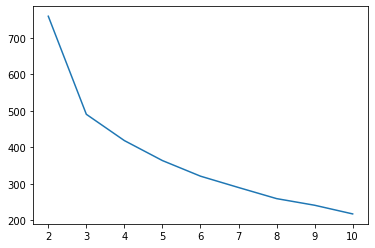

In [53]:
from sklearn.cluster import KMeans
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_scaled)
    ssd.append([k, kmean.inertia_])
    
var = pd.DataFrame(ssd)
plt.plot(var[0], var[1])
plt.show()

In [54]:
#Elow joint appears at 3 so optimum number of clusters=3.

In [55]:
#Dividing the dataset into 3 clusters-
kmean = KMeans(n_clusters = 3, random_state = 42)
kmean.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [56]:
df_temp = df.copy()

In [57]:
label  = pd.DataFrame(kmean.labels_, columns= ['cluster_number'])
label.head()

,cluster_number
0,1
1,0
2,0
3,1
4,0


In [58]:
df_temp = pd.concat([df_temp, label], axis =1)
df_temp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_number
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0.0


In [59]:
df_temp.dropna(inplace=True)

In [60]:
df_temp.shape

(145, 11)

In [61]:
df_temp['cluster_number'] = df_temp['cluster_number'].astype(int)

In [62]:
df_temp.isna().sum()

country           0
child_mort        0
exports           0
health            0
imports           0
income            0
inflation         0
life_expec        0
total_fer         0
gdpp              0
cluster_number    0
dtype: int64

In [63]:
df_temp.cluster_number.value_counts().sort_values(ascending=False)

0    74
1    44
2    27
Name: cluster_number, dtype: int64

In [64]:
#cluster 1 has 80 countries.
#cluster 2 has 47 and cluster 3 has 28.

In [65]:
#Plotting the clusters-

In [66]:
#Red represents cluster 0.
#Blue represents cluster 1.
#Green represent cluster 2.

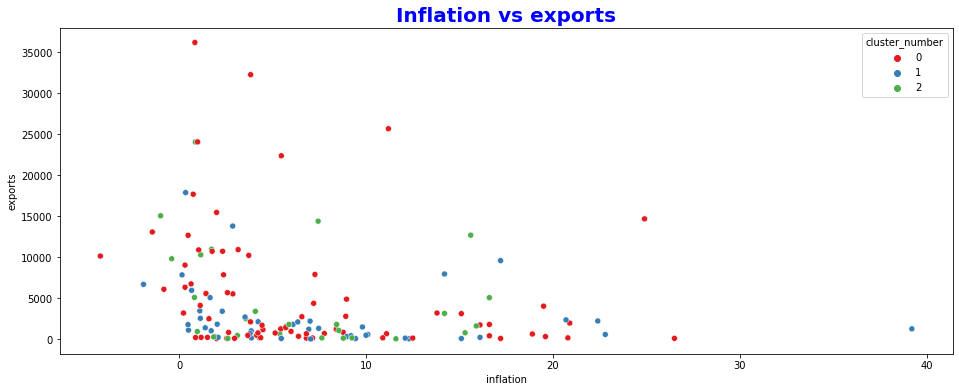

In [67]:
plt.figure(figsize = (16,6))
sns.scatterplot(x = 'inflation', y = 'exports', hue = 'cluster_number', data = df_temp, palette = 'Set1')
plt.title('Inflation vs exports',fontweight="bold", size=20,color='blue')
plt.show()

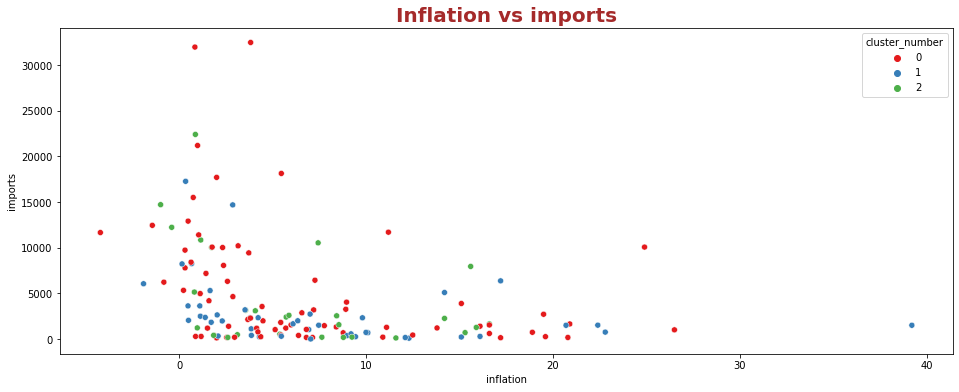

In [68]:
plt.figure(figsize = (16,6))
sns.scatterplot(x = 'inflation', y = 'imports', hue = 'cluster_number', data = df_temp, palette = 'Set1')
plt.title('Inflation vs imports',fontweight="bold", size=20,color='brown')
plt.show()

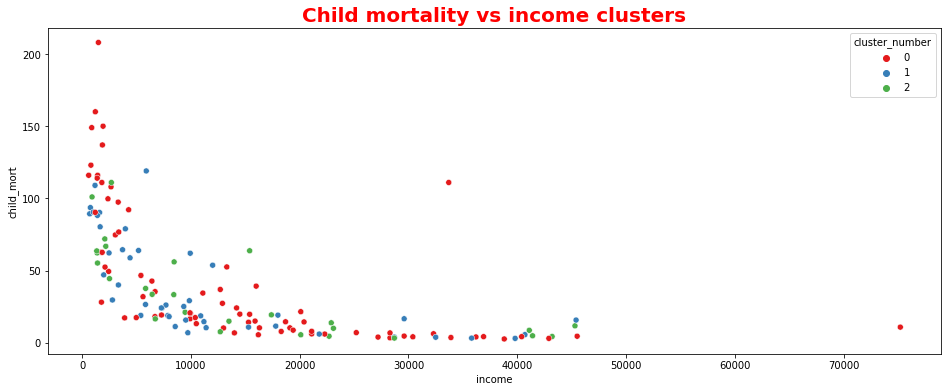

In [69]:
plt.figure(figsize = (16,6))
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_number', data = df_temp, palette = 'Set1')
plt.title('Child mortality vs income clusters',fontweight="bold", size=20,color='red')
plt.show()

In [70]:
#We need to see what values each cluster is representing. To do that-

In [71]:
df_temp.isna().sum()

country           0
child_mort        0
exports           0
health            0
imports           0
income            0
inflation         0
life_expec        0
total_fer         0
gdpp              0
cluster_number    0
dtype: int64

In [72]:
df_temp['cluster_number']

0      1
1      0
2      0
3      1
4      0
      ..
150    0
151    0
152    0
153    1
154    1
Name: cluster_number, Length: 145, dtype: int32

In [73]:
df0=df_temp[df_temp['cluster_number'] == 0]
df0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_number
1,Albania,16.6,1145.200,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.640,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
4,Antigua and Barbuda,10.3,5551.000,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0
5,Argentina,14.5,1946.700,834.3000,1648.000,18700.0,20.90,75.8,2.37,10300.0,0
6,Armenia,18.1,669.760,141.6800,1458.660,6700.0,7.77,73.3,1.69,3220.0,0
...,...,...,...,...,...,...,...,...,...,...,...
146,Tajikistan,52.4,109.962,44.1324,432.468,2110.0,12.50,69.6,3.51,738.0,0
149,Timor-Leste,62.6,79.200,328.3200,1000.800,1850.0,26.50,71.1,6.23,3600.0,0
150,Togo,90.3,196.176,37.3320,279.624,1210.0,1.18,58.7,4.87,488.0,0
151,Tonga,17.4,440.200,179.9850,2140.650,4980.0,3.68,69.9,3.91,3550.0,0


In [74]:
df1=df_temp[df_temp['cluster_number'] == 1]
df1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_number
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610.0,9.440,56.2,5.82,553.0,1
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900.0,22.400,60.1,6.16,3530.0,1
16,Belize,18.8,2525.88000,225.6800,2495.500000,7880.0,1.140,71.4,2.71,4340.0,1
20,Bosnia and Herzegovina,6.9,1369.17000,511.7100,2364.930000,9720.0,1.400,76.8,1.31,4610.0,1
24,Bulgaria,10.8,3433.68000,469.9080,3625.200000,15300.0,1.110,73.9,1.57,6840.0,1
26,Burundi,93.6,20.60520,26.7960,90.552000,764.0,12.300,57.7,6.26,231.0,1
29,Canada,5.6,13793.40000,5356.2000,14694.000000,40700.0,2.870,81.3,1.63,47400.0,1
30,Cape Verde,26.5,1082.37000,135.3790,2045.580000,5830.0,0.505,72.5,2.67,3310.0,1
34,China,15.7,1199.28000,231.1920,1030.560000,9530.0,6.940,74.6,1.59,4560.0,1
35,Colombia,18.6,993.75000,474.3750,1112.500000,10900.0,3.860,76.4,2.01,6250.0,1


In [75]:
df2=df_temp[df_temp['cluster_number'] == 2]
df2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_number
7,Australia,4.8,10276.2000,4530.8700,10847.100,41400.0,1.160,82.0,1.93,51900.0,2
8,Austria,4.3,24059.7000,5159.0000,22418.200,43200.0,0.873,80.5,1.44,46900.0,2
10,Bahamas,13.8,9800.0000,2209.2000,12236.000,22900.0,-0.393,73.8,1.86,28000.0,2
11,Bahrain,8.6,14386.5000,1028.7900,10536.300,41100.0,7.440,76.0,2.16,20700.0,2
27,Cambodia,44.4,425.2260,44.6448,467.670,2520.0,3.120,66.1,2.88,786.0,2
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690.0,5.390,56.3,5.27,1220.0,2
41,Croatia,5.5,5076.0000,1047.6000,5143.500,20100.0,0.821,76.3,1.55,13500.0,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.61,482.0,2
51,Estonia,4.5,10964.6000,880.3800,10030.200,22700.0,1.740,76.0,1.72,14600.0,2
55,Gabon,63.7,5048.7500,306.2500,1653.750,15400.0,16.600,62.9,4.08,8750.0,2


In [76]:
df0.shape
#Cluser1 has 74 countries.

(74, 11)

In [77]:
df1.shape
#Cluster2 has 44 countries.

(44, 11)

In [78]:
df2.shape
#Cluster3 has 27 countries.

(27, 11)

In [79]:
df0.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_number
count,74,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.0
unique,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Botswana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,43.132432,5375.683122,878.360158,5192.992027,14966.229730,6.612514,70.356757,2.995135,10711.189189,0.0
std,NaN,47.950228,7677.280729,1324.880609,6743.923573,14023.464744,6.692548,9.796995,1.600444,13044.672601,0.0
min,NaN,2.600000,52.628000,17.750800,118.190000,609.000000,-4.210000,32.100000,1.230000,334.000000,0.0
25%,NaN,7.825000,399.887500,94.110000,745.695000,3125.000000,1.805000,65.550000,1.782500,1352.500000,0.0
50%,NaN,19.750000,1859.850000,341.191000,2064.195000,12800.000000,4.405000,73.150000,2.350000,5935.000000,0.0
75%,NaN,62.675000,7558.875000,943.622500,7996.000000,20925.000000,8.885000,77.725000,3.895000,12725.000000,0.0


In [80]:
df1.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_number
count,44,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
unique,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"Congo, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.818182,2648.012244,659.111766,2771.631048,11806.454545,7.641114,69.813636,3.019773,8147.636364,1.0
std,NaN,33.279474,3755.463259,1233.146960,3591.833296,11933.174457,7.913845,7.761910,1.458716,12208.583085,0.0
min,NaN,3.000000,1.076920,19.463600,0.651092,700.000000,-1.900000,53.100000,1.310000,231.000000,1.0
25%,NaN,13.825000,378.945000,53.527500,520.908250,3625.000000,1.960000,65.375000,1.975000,1102.000000,1.0
50%,NaN,24.600000,1334.655000,206.408000,1747.700000,7940.000000,5.785000,71.350000,2.650000,3590.000000,1.0
75%,NaN,62.625000,2565.155000,471.024750,2844.685000,12825.000000,10.025000,75.350000,3.680000,7302.500000,1.0


In [81]:
df2.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_number
count,27,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0
unique,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,35.037037,4721.717511,786.061193,4391.332444,15089.925926,6.507778,69.685185,2.974074,10413.518519,2.0
std,NaN,30.855048,6158.054900,1310.555967,5616.934388,14196.995733,5.452221,7.899353,1.422425,13675.747889,0.0
min,NaN,3.200000,23.087800,12.821200,112.306000,918.000000,-0.987000,54.500000,1.400000,413.000000,2.0
25%,NaN,9.300000,521.273000,61.887500,497.965000,2605.000000,1.795000,63.450000,1.740000,1110.000000,2.0
50%,NaN,21.100000,1777.440000,298.960000,2257.700000,9470.000000,5.730000,72.800000,2.580000,5080.000000,2.0
75%,NaN,59.100000,7438.000000,721.510000,6547.550000,22800.000000,9.020000,76.000000,4.295000,14050.000000,2.0


In [86]:
df_temp.isna().sum()

country           0
child_mort        0
exports           0
health            0
imports           0
income            0
inflation         0
life_expec        0
total_fer         0
gdpp              0
cluster_number    0
dtype: int64

In [94]:
df_temp.drop(['country'],axis = 1).groupby('cluster_number').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_number,,,,,,,,,
0,43.132432,5375.683122,878.360158,5192.992027,14966.229730,6.612514,70.356757,2.995135,10711.189189
1,38.818182,2648.012244,659.111766,2771.631048,11806.454545,7.641114,69.813636,3.019773,8147.636364
2,35.037037,4721.717511,786.061193,4391.332444,15089.925926,6.507778,69.685185,2.974074,10413.518519


In [95]:
#Cluster 1 has low income,low GDP,highest inflation,highest fertility,lowest export,lowest imports,highest inflation.

In [98]:
ans=df_temp[df_temp['cluster_number'] == 1]
ans.shape

(44, 11)

In [99]:
#Out of the 44 countries in cluster 1, getting the top 10 countries which are in dire need of money from the NGO.
#To do this, we'll sort the cluster 1 according to low income, high GDP, high inflation,high fertility,low export, low import, high inflation 

In [100]:
ans=ans.sort_values(by=['exports','health','imports','income','inflation','total_fer','gdpp'],ascending=[True,True,True,True,False,False,True])
ans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_number
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720.0,7.04,66.8,2.41,988.0,1
26,Burundi,93.6,20.60520,26.7960,90.552000,764.0,12.30,57.7,6.26,231.0,1
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610.0,9.44,56.2,5.82,553.0,1
109,Nepal,47.0,56.71360,31.0800,215.488000,1990.0,15.10,68.3,2.61,592.0,1
88,Liberia,89.3,62.45700,38.5860,302.802000,700.0,5.47,60.8,5.02,327.0,1
94,Malawi,90.5,104.65200,30.2481,160.191000,1030.0,12.10,53.1,5.31,459.0,1
36,Comoros,88.2,126.88500,34.6819,397.573000,1410.0,3.87,65.9,4.75,769.0,1
56,Gambia,80.3,133.75600,31.9778,239.974000,1660.0,4.30,65.5,5.71,562.0,1
63,Guinea,109.0,196.34400,31.9464,279.936000,1190.0,16.10,58.0,5.34,648.0,1
80,Kenya,62.2,200.16900,45.9325,324.912000,2480.0,2.09,62.8,4.37,967.0,1


In [103]:
#Therefore top 10 countries which need the NGOs help the most are-
ans.head(10)['country']

107        Myanmar
26         Burundi
0      Afghanistan
109          Nepal
88         Liberia
94          Malawi
36         Comoros
56          Gambia
63          Guinea
80           Kenya
Name: country, dtype: object